In [156]:
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv("greenbuildings.csv")

In [158]:
df.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


Instead of removing our lower occupancy rates, let's try to bucket the occupancy rate appropriately so we can have a clearer idea of how much rent we can expect at each bucket given a non-green and green building

In [159]:
df["Occupancy Rate Bin"] = pd.cut(df["leasing_rate"], 10)

In [160]:
#Let's look at the median and mean costs of rent 
analysis_df  = pd.DataFrame(df.groupby(["Occupancy Rate Bin", "green_rating"])["cluster_rent"].agg(["mean", "median"])).reset_index()

analysis_pt = pd.pivot_table(analysis_df, index = "Occupancy Rate Bin", columns="green_rating"\
                            , values = ["mean", "median"])
analysis_pt["Cost Diff by Mean"] = analysis_pt[("mean", 1)] - analysis_pt[("mean", 0)]
analysis_pt["Cost Diff by Median"] = analysis_pt[("median", 1)] - analysis_pt[("median", 0)]

analysis_pt["Yearly Rev by Mean"] = analysis_pt["Cost Diff by Mean"]*250000
analysis_pt["Yearly Rev by Median"] = analysis_pt["Cost Diff by Median"] * 250000

In [161]:
# Determine Profitability
analysis_pt["Profitable by Mean"] = "No"
mask_mean = analysis_pt["Yearly Rev by Mean"] > 0
analysis_pt.loc[mask_mean, "Profitable by Mean"] = "Yes"

# Determine Profitability by Median
analysis_pt["Profitable by Median"] = "No"
mask_median = analysis_pt["Yearly Rev by Median"] > 0
analysis_pt.loc[mask_median, "Profitable by Median"] = "Yes"

In [162]:
# Display the updated DataFrame
analysis_pt["Years to Recover by Mean"] = 0
mask_year_mean = analysis_pt["Profitable by Mean"] == "Yes"
analysis_pt.loc[mask_year_mean, "Years to Recover by Mean"] = 5000000/analysis_pt["Yearly Rev by Mean"]

# Display the updated DataFrame
analysis_pt["Years to Recover by Median"] = 0
mask_year_mean = analysis_pt["Profitable by Median"] == "Yes"
analysis_pt.loc[mask_year_mean, "Years to Recover by Median"] = 5000000/analysis_pt["Yearly Rev by Median"]

In [163]:
analysis_pt

mean              median         Cost Diff by Mean  \
green_rating                0          1        0       1                     
Occupancy Rate Bin                                                            
(-0.1, 10.0]        24.006846  19.625000  20.8075  19.625         -4.381846   
(10.0, 20.0]        23.297143  31.825000  22.3400  31.825          8.527857   
(20.0, 30.0]        26.292796  25.200000  23.4000  25.200         -1.092796   
(30.0, 40.0]        27.055439  28.635000  25.9475  28.800          1.579561   
(40.0, 50.0]        24.049464  32.796667  23.0600  33.290          8.747202   
(50.0, 60.0]        23.875978  23.860909  23.1200  23.120         -0.015069   
(60.0, 70.0]        24.762887  24.560556  22.5650  22.500         -0.202331   
(70.0, 80.0]        24.685381  24.474914  23.1200  23.750         -0.210467   
(80.0, 90.0]        26.165901  26.387704  23.7500  25.200          0.221804   
(90.0, 100.0]       29.970238  27.588571  27.4050  25.520         -2.381666   

                   Cost Diff by Median Yearly Rev by Mean  \
green_rating                                                
Occupancy Rate Bin                                          
(-0.1, 10.0]                   -1.1825      -1.095461e+06   
(10.0, 20.0]                    9.4850       2.131964e+06   
(20.0, 30.0]                    1.8000      -2.731989e+05   
(30.0, 40.0]                    2.8525       3.948904e+05   
(40.0, 50.0]                   10.2300       2.186801e+06   
(50.0, 60.0]                    0.0000      -3.767172e+03   
(60.0, 70.0]                   -0.0650      -5.058279e+04   
(70.0, 80.0]                    0.6300      -5.261676e+04   
(80.0, 90.0]                    1.4500       5.545091e+04   
(90.0, 100.0]                  -1.8850      -5.954166e+05   

                   Yearly Rev by Median Profitable by Mean  \
green_rating                                                 
Occupancy Rate Bin                                           
(-0.1, 10.0]                  -295625.0                 No   
(10.0, 20.0]                  2371250.0                Yes   
(20.0, 30.0]                   450000.0                 No   
(30.0, 40.0]                   713125.0                Yes   
(40.0, 50.0]                  2557500.0                Yes   
(50.0, 60.0]                        0.0                 No   
(60.0, 70.0]                   -16250.0                 No   
(70.0, 80.0]                   157500.0                 No   
(80.0, 90.0]                   362500.0                Yes   
(90.0, 100.0]                 -471250.0                 No   

                   Profitable by Median Years to Recover by Mean  \
green_rating                                                       
Occupancy Rate Bin                                                 
(-0.1, 10.0]                         No                 0.000000   
(10.0, 20.0]                        Yes                 2.345255   
(20.0, 30.0]                        Yes                 0.000000   
(30.0, 40.0]                        Yes                12.661743   
(40.0, 50.0]                        Yes                 2.286445   
(50.0, 60.0]                         No                 0.000000   
(60.0, 70.0]                         No                 0.000000   
(70.0, 80.0]                        Yes                 0.000000   
(80.0, 90.0]                        Yes                90.169848   
(90.0, 100.0]                        No                 0.000000   

                   Years to Recover by Median  
green_rating                                   
Occupancy Rate Bin                             
(-0.1, 10.0]                         0.000000  
(10.0, 20.0]                         2.108593  
(20.0, 30.0]                        11.111111  
(30.0, 40.0]                         7.011394  
(40.0, 50.0]                         1.955034  
(50.0, 60.0]                         0.000000  
(60.0, 70.0]                         0.000000  
(70.0, 80.0]                   

<Axes: xlabel='Occupancy Rate Bin'>

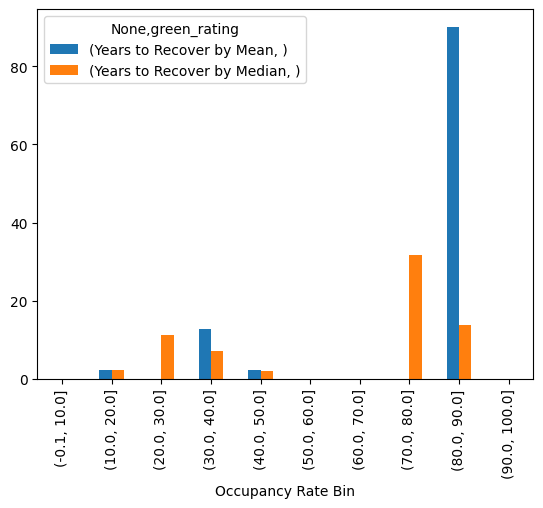

In [164]:
#Now lets plot how many years it will take to recover for a better visual representation
analysis_pt[["Years to Recover by Mean", "Years to Recover by Median"]].plot(kind = "bar")

Based on the graph above, I would highly suggest against investing in a green house building. This is for a few reasons
1. When we break up the occupancy rate into buckets or bins, we can see that for a low end, high end, or middling occupancy rate, the average cluster rent differnce between a non-green building and a green building isn't high enough to recoup the cost in the first place and would actually lose out on revenue
2. For the buildings that would be profitable, the amount of time taken varies depending on the given occupancy rate. Depending on the expectated occupancy rate of the Austin, developer and the cluster rent, the years taken to recoup cost varies quite a lot.

What if we got rid of our outliers? And re-ran our results? Would this change?

In [165]:
q75 = df["leasing_rate"].quantile(0.75)
q25 = df["leasing_rate"].quantile(0.25)

iqr = q75-q25

mask = df["leasing_rate"] <= q25 - 1.5*iqr
df = df[~mask]

df["Occupancy Rate Bin"] = pd.cut(df["leasing_rate"], 10)


In [166]:
#Let's look at the median and mean costs of rent 
analysis_df  = pd.DataFrame(df.groupby(["Occupancy Rate Bin", "green_rating"])["cluster_rent"].agg(["mean", "median"])).reset_index()

analysis_pt = pd.pivot_table(analysis_df, index = "Occupancy Rate Bin", columns="green_rating"\
                            , values = ["mean", "median"])
analysis_pt["Cost Diff by Mean"] = analysis_pt[("mean", 1)] - analysis_pt[("mean", 0)]
analysis_pt["Cost Diff by Median"] = analysis_pt[("median", 1)] - analysis_pt[("median", 0)]

analysis_pt["Yearly Rev by Mean"] = analysis_pt["Cost Diff by Mean"]*250000
analysis_pt["Yearly Rev by Median"] = analysis_pt["Cost Diff by Median"] * 250000

# Determine Profitability
analysis_pt["Profitable by Mean"] = "No"
mask_mean = analysis_pt["Yearly Rev by Mean"] > 0
analysis_pt.loc[mask_mean, "Profitable by Mean"] = "Yes"

# Determine Profitability by Median
analysis_pt["Profitable by Median"] = "No"
mask_median = analysis_pt["Yearly Rev by Median"] > 0
analysis_pt.loc[mask_median, "Profitable by Median"] = "Yes"

# Display the updated DataFrame
analysis_pt["Years to Recover by Mean"] = 0
mask_year_mean = analysis_pt["Profitable by Mean"] == "Yes"
analysis_pt.loc[mask_year_mean, "Years to Recover by Mean"] = 5000000/analysis_pt["Yearly Rev by Mean"]

# Display the updated DataFrame
analysis_pt["Years to Recover by Median"] = 0
mask_year_mean = analysis_pt["Profitable by Median"] == "Yes"
analysis_pt.loc[mask_year_mean, "Years to Recover by Median"] = 5000000/analysis_pt["Yearly Rev by Median"]

analysis_pt

mean             median          Cost Diff by Mean  \
green_rating                0          1       0        1                     
Occupancy Rate Bin                                                            
(49.95, 55.0]       22.703968  23.718333  22.305  19.1875          1.014365   
(55.0, 60.0]        24.397160  24.032000  23.400  23.5300         -0.365160   
(60.0, 65.0]        23.710636  23.034167  21.215  23.6000         -0.676470   
(65.0, 70.0]        25.353435  25.781667  23.000  22.5000          0.428231   
(70.0, 75.0]        25.509586  23.409000  23.000  22.2250         -2.100586   
(75.0, 80.0]        24.153759  25.035921  23.240  24.1875          0.882162   
(80.0, 85.0]        26.391361  25.851129  23.540  23.4000         -0.540232   
(85.0, 90.0]        26.035294  26.730670  23.875  25.8000          0.695376   
(90.0, 95.0]        27.865274  25.908741  25.715  24.8300         -1.956533   
(95.0, 100.0]       31.097194  28.493095  28.800  26.4000         -2.604099   

                   Cost Diff by Median Yearly Rev by Mean  \
green_rating                                                
Occupancy Rate Bin                                          
(49.95, 55.0]                  -3.1175      253591.269841   
(55.0, 60.0]                    0.1300      -91290.000000   
(60.0, 65.0]                    2.3850     -169117.424242   
(65.0, 70.0]                   -0.5000      107057.823129   
(70.0, 75.0]                   -0.7750     -525146.582734   
(75.0, 80.0]                    0.9475      220540.587984   
(80.0, 85.0]                   -0.1400     -135057.919069   
(85.0, 90.0]                    1.9250      173844.064952   
(90.0, 95.0]                   -0.8850     -489133.204404   
(95.0, 100.0]                  -2.4000     -651024.699599   

                   Yearly Rev by Median Profitable by Mean  \
green_rating                                                 
Occupancy Rate Bin                                           
(49.95, 55.0]                 -779375.0                Yes   
(55.0, 60.0]                    32500.0                 No   
(60.0, 65.0]                   596250.0                 No   
(65.0, 70.0]                  -125000.0                Yes   
(70.0, 75.0]                  -193750.0                 No   
(75.0, 80.0]                   236875.0                Yes   
(80.0, 85.0]                   -35000.0                 No   
(85.0, 90.0]                   481250.0                Yes   
(90.0, 95.0]                  -221250.0                 No   
(95.0, 100.0]                 -600000.0                 No   

                   Profitable by Median Years to Recover by Mean  \
green_rating                                                       
Occupancy Rate Bin                                                 
(49.95, 55.0]                        No                19.716767   
(55.0, 60.0]                        Yes                 0.000000   
(60.0, 65.0]                        Yes                 0.000000   
(65.0, 70.0]                         No                46.703733   
(70.0, 75.0]                         No                 0.000000   
(75.0, 80.0]                        Yes                22.671564   
(80.0, 85.0]                         No                 0.000000   
(85.0, 90.0]                        Yes                28.761408   
(90.0, 95.0]                         No                 0.000000   
(95.0, 100.0]                        No                 0.000000   

                   Years to Recover by Median  
green_rating                                   
Occupancy Rate Bin                             
(49.95, 55.0]                        0.000000  
(55.0, 60.0]                       153.846154  
(60.0, 65.0]                         8.385744  
(65.0, 70.0]                         0.000000  
(70.0, 75.0]                         0.000000  
(75.0, 80.0]                        21.108179  
(80.0, 85.0]                         0.000000  
(85.0, 90.0]                   

<Axes: xlabel='Occupancy Rate Bin'>

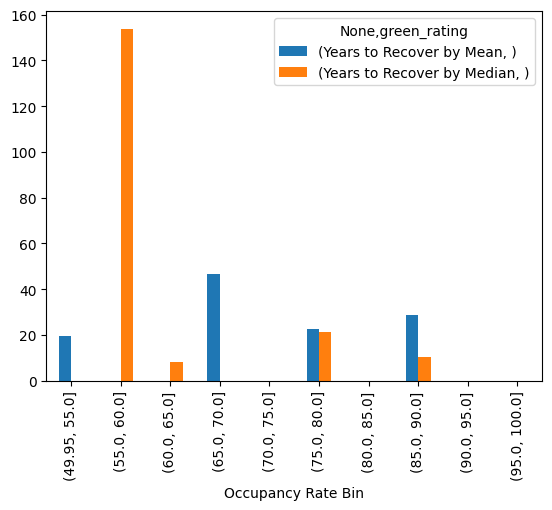

In [167]:
analysis_pt[["Years to Recover by Mean", "Years to Recover by Median"]].plot(kind = "bar")

The only clear difference is that there might be some profitability between 60-70% profitability now however the time to recoup the cost is insanely high and there isn't much difference (if any) between a green house and a nongreen house meaning that spending additional 5 million to invest in green buildings is likely not worth it.